# Constant Current
Experiments are run using methods from the ``Simulation`` class. To construct a pseudo-2D (P2D) model, call the ``Simulation`` class specifically from the ``P2D`` package. Remember, if you do not provide a ``.yaml`` input file, the simulation will initialize with the "default_P2D" file parameters. 

In [1]:
import bmlite as bm

sim = bm.P2D.Simulation()


[BatMods WARNING]
	P2D Simulation: Using a default yaml



After initializing, you are ready to run any available experiment. Experiments are accessed from "run" methods. For example, to run a constant current eperiment, call ``sim.run_CC()``. The "run" methods each require an experiment input dictionary ``exp``. You can use either ``help(sim.run_CC)`` or the ``templates()`` function to get help constructing the ``exp`` input. Below, we will use ``help`` which provides more detail.

In [2]:
help(sim.run_CC)

Help on method run_CC in module bmlite.P2D:

run_CC(exp: dict, **kwargs) -> object method of bmlite.P2D.Simulation instance
    Runs a constant current experiment specified by the details given in
    the experiment dictionary ``exp``.
    
    Parameters
    ----------
    exp : dict
        The constant current experimental details. Required keys and
        descriptions are listed below:
    
        =========== ==============================================
        Key         Value [units] (*type*)
        =========== ==============================================
        C_rate      C-rate (+ charge, - discharge) [1/h] (*float*)
        t_min       minimum time [s] (*float*)
        t_max       maximum time [s] (*float*)
        Nt          number of time discretizations [-] (*int*)
        =========== ==============================================
    
    **kwargs : dict, optional
        The keyword arguments specify the Sundials IDA solver options. A
        partial list of o

The output above defines the key/value pairs for a constant current experiment. From these details, we construct an ``exp`` dictionary below for a 2C discharge experiment. The experiment will run from a starting time ``t = 0`` to ``t = 1350`` seconds, saving the state at ``Nt = 150`` equally spaced time steps. The ``run_CC()`` outputs a solution class (named ``sol`` below). 

In [3]:
exp = {'C_rate': -2,
       't_min': 0., 
       't_max': 1350.,
       'Nt': 150
       }

sol = sim.run_CC(exp)

## Understand the Solution
The solution class contains methods for post processing and plotting. For a quick overview, we can view the solution ``report``, as shown below. The report prints a reminder for the experimental details, and shows that the problem successfully converged to a solution. The codeblock below also calls the ``plot()`` method to make a figure for current, voltage, and power versus time. Use ``help(sol.plot)`` to see a list of other plots that can be generated.

Experiment(C_rate = -2,
           t_min = 0.0,
           t_max = 1350.0,
           Nt = 150)

Solution(classname = CCSolution,
         success = True,
         onroot = False,
         message = Successful function return.,
         solvetime = 16.524 s)



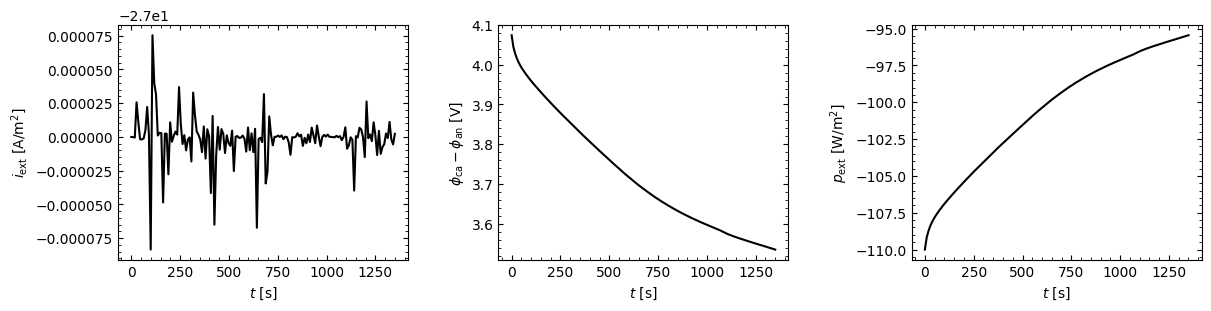

In [4]:
sol.report()
sol.plot('ivp')

## Saving Results
To save results, use the ``slice_and_save()`` method. The ``slice_and_save()`` method slices the solution into separate 1D, 2D, and 3D arrays for each state variable, and saves the results into a single ``.npz`` file defined by the input argument. For descriptions of the sliced arrays, use ``help(sol.slice_and_save)``. Below, we save the results to a file called ``2C_discharge.npz``. Note that the ``.npz`` extension is optional.

```python
sol.slice_and_save('2C_discharge')
```

By default, your file will be saved to your working directory. You can also save to another directory by passing the absolute or relative path to the desired save location, e.g. ``'../2C_discharge'``. 

## Loading Results
Results from an ``.npz`` file can be read in using ``numpy.load()``.

```python
import numpy as np

data = np.load('2C_discharge.npz')
```

The ``.npz`` extension is required here. The returned ``data`` acts similarly to a dictionary. For example, to see the saved times, call ``data['t']``. For help with the ``load()`` function, please refer to the [Numpy Documentation](https://numpy.org/doc/stable/reference/generated/numpy.load.html#numpy.load).